In [1]:
# Importing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# ==========================
# Display Settings
# ==========================

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# ==========================
# Loading Dataset
# ==========================
df = pd.read_csv("NetflixOriginals.csv", encoding='ISO-8859-1')

In [6]:
# ==========================
# Exploratory Data Analysis
# ==========================

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### MissingValues #######################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    # Only calculate quantiles for numerical columns
    num_df = dataframe.select_dtypes(include=np.number)  # Select numerical columns
    print(num_df.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)


check_df(df)


def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


grab_col_names(df)
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

##################### Shape #####################
(584, 6)
##################### Types #####################
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None
##################### Head #####################
             Title                  Genre           Premiere  Runtime  IMDB Score  \
0  Enter the Anime            Documentary     August 5, 2019 

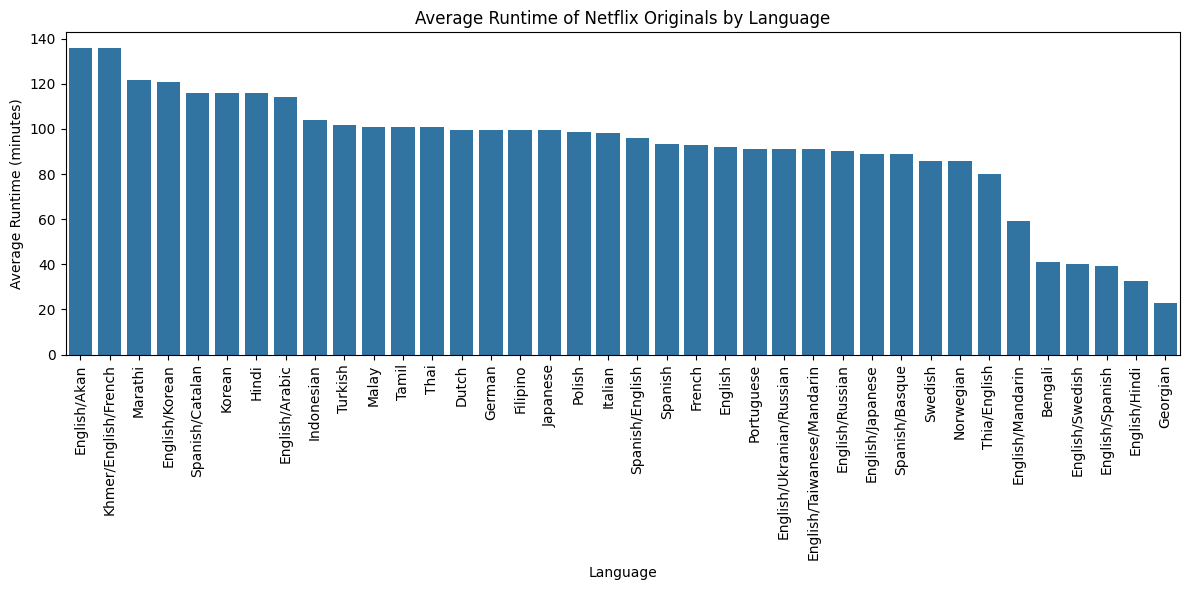

In [8]:

# ... (your existing code) ...

# Calculate average runtime by language
langbyruntime = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()

# Create a bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x="Language", y="Runtime", data=langbyruntime)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Average Runtime of Netflix Originals by Language")
plt.xlabel("Language")
plt.ylabel("Average Runtime (minutes)")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [10]:
# Finding the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020 and visualization.

df["Date"] = pd.to_datetime(df.Premiere, errors='coerce', infer_datetime_format=True)


df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()

docum = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()
docum["Title"].value_counts()


print(df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head())

fig = px.bar(data_frame=docum, x=docum.Title, y=docum["IMDB Score"], labels={"y":"IMDB Score", "index":"Titles"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

<ipython-input-10-52197a167676>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date"] = pd.to_datetime(df.Premiere, errors='coerce', infer_datetime_format=True)


                                 Title        Genre            Premiere  Runtime  IMDB Score  \
0                      Enter the Anime  Documentary      August 5, 2019       58       2.500   
15                      After the Raid  Documentary   December 19, 2019       25       4.300   
20   Hello Privilege. It's Me, Chelsea  Documentary  September 13, 2019       64       4.400   
30                         After Maria  Documentary        May 24, 2019       37       4.600   
263             A Tale of Two Kitchens  Documentary        May 22, 2019       30       6.300   

             Language       Date  
0    English/Japanese 2019-08-05  
15            Spanish 2019-12-19  
20            English 2019-09-13  
30    English/Spanish 2019-05-24  
263   English/Spanish 2019-05-22  


In [11]:
# The genre has the highest IMDB rating among movies made in English

df.loc[(df["Language"] == "English")]
dfeng = df.loc[(df["Language"] == "English")]
dfeng.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.000,English,2020-10-04


In [12]:
df.loc[(df["Language"] == "Hindi")].agg({"Runtime": "mean"})

,0
Runtime,115.788


In [13]:
# Value Counts of the 'Genre' Column have and what are those categories and visualization.

df["Genre"].unique()
df["Genre"].value_counts()
print(df["Genre"].value_counts())
topgenre = df["Genre"].value_counts().nlargest(30)

fig = px.bar(data_frame=topgenre, x=topgenre.index, y=topgenre.values, labels={"y":"Number of Movies from the Genre", "index":"Genres"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama              

In [14]:
# The 3 most used languages in the movies in the data set.


df["Language"].value_counts(sort=True)[0:3]

,count
Language,
English,401
Hindi,33
Spanish,31


In [15]:
!pip install plotly

In [16]:
import pandas as pd
import plotly.express as px


# Assuming df is your DataFrame containing the movie data

# Get the 3 most used languages
top_3_languages = df["Language"].value_counts(sort=True)[0:3].reset_index()
top_3_languages.columns = ['Language', 'Count']  # Rename columns for clarity

# Create the donut graph using Plotly
fig = px.pie(
    top_3_languages,
    values='Count',
    names='Language',
    hole=0.4,  # Create the hole for the donut effect
    title="Top 3 Most Used Languages in Netflix Originals"
)

# Update layout for better aesthetics
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)  # Hide the legend (optional)

# Show the graph
fig.show()

In [17]:
# The top 10 movies with the highest 'runtime' and visualization.

df.sort_values(by="IMDB Score", ascending=False)[0:10]

top_10_ratings = df.sort_values(by="IMDB Score", ascending=False)[0:10]
fig = px.scatter(top_10_ratings, y= 'Title', x='IMDB Score', color='Genre',
                 title = "Top 10 High Rated Programs")

fig.show()

            IMDB Score  Runtime
IMDB Score       1.000   -0.041
Runtime         -0.041    1.000


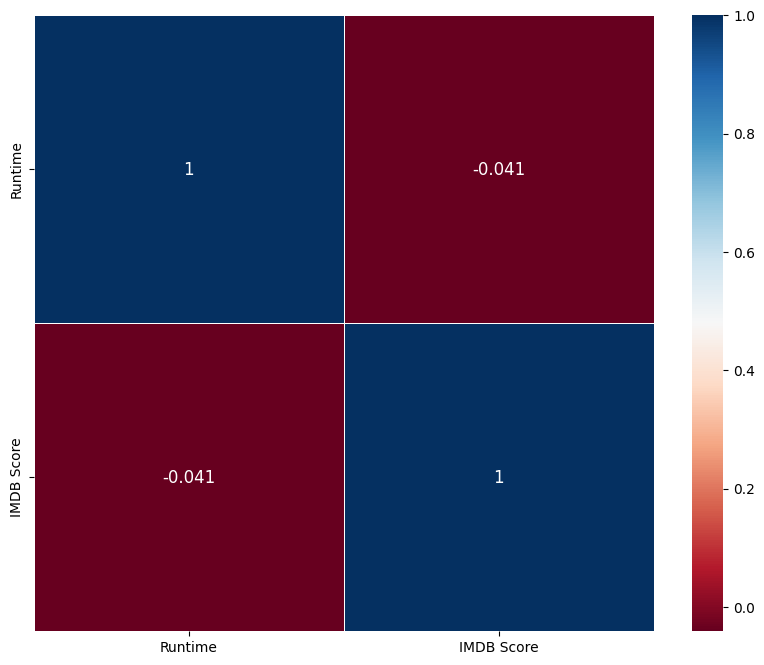

There is no high correlation between Runtime and IMDB Scores


In [18]:
# The correlation between IMDB score and 'Runtime' and visualization.

def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.show(block=True)

print(df[["IMDB Score", "Runtime"]].corr())
correlation_matrix(df, num_cols)
print("There is no high correlation between Runtime and IMDB Scores")

                                      IMDB Score
Genre                                           
Documentary                                9.000
One-man show                               8.500
Concert Film                               8.400
Animation/Christmas/Comedy/Adventure       8.200
Drama                                      7.900
Animation / Short                          7.800
Crime drama                                7.800
Musical / Short                            7.700
Making-of                                  7.700
War drama                                  7.700


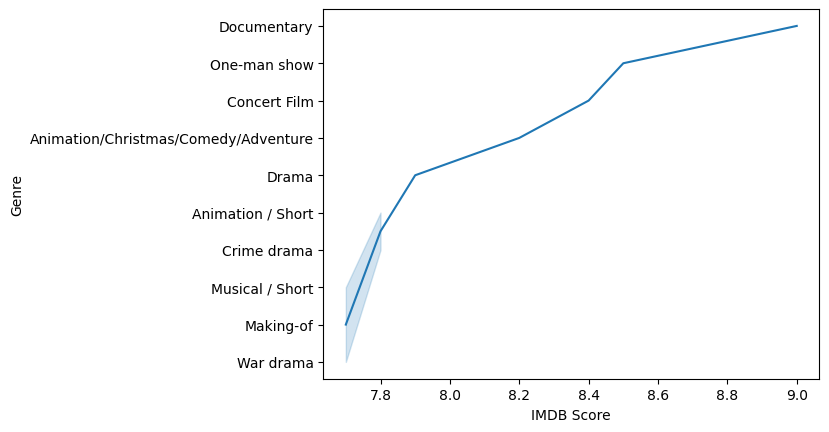

In [19]:
# The top 10 'Genre's with the highest IMDB Ratings and visualization.


df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10]
genrescore_on = df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[
                0:10].reset_index()

print (df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10])
sns.lineplot(y=genrescore_on["Genre"], x=genrescore_on["IMDB Score"])
plt.show()

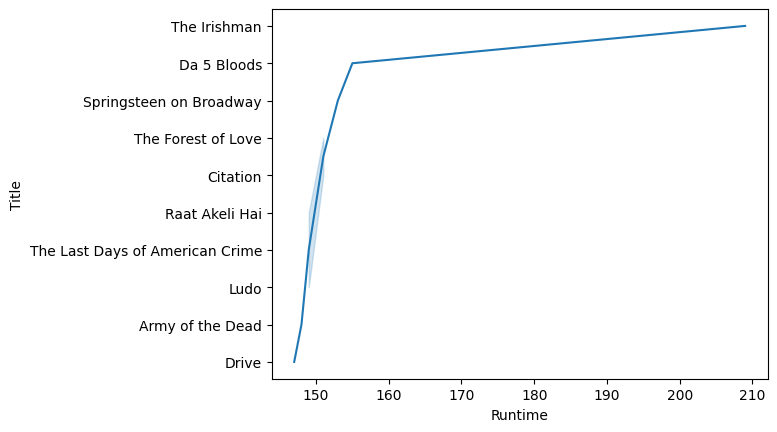

In [21]:
# The top 10 movies with the highest 'runtime' and visualization.

df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10]

Runtime_on = df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10].reset_index()

sns.lineplot(y=Runtime_on["Title"], x=Runtime_on["Runtime"])
plt.show()

In [23]:
# The year was the most movies released and visualization.

df['Year'] = df['Date'].dt.year
# Get the most frequent year and its count
most_frequent_year = df['Year'].value_counts().idxmax()
most_frequent_year_count = df['Year'].value_counts().max()
print(f"The year with the most movies released is {most_frequent_year} with {most_frequent_year_count} movies.")

year = df['Year'].value_counts(sort=True)

fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

The year with the most movies released is 2020.0 with 183 movies.


In [24]:
# The language movies have the lowest average IMDB rating and visualization.


df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)[0:1]

df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)
lowest = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)

fig = px.bar(data_frame=lowest, x=lowest.index, y=lowest.values,
             labels={'y':'Average Rating Score', 'x':'Language'})

fig.show()

In [29]:
# The year has the greatest total runtime

# Group by "Year", calculate total runtime, and sort
year_runtime = df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)

# Access the first row using .iloc or .head()
greatest_runtime_year = year_runtime.iloc[0:1] # Using iloc to access by position
# greatest_runtime_year = year_runtime.head(1) # Using head to get the first row

print(greatest_runtime_year)

          Runtime
Year             
2020.000    17384


In [30]:
# The most used "Genre" of each language

df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

,,count
Language,Genre,
Bengali,Documentary,1
Dutch,Crime drama,1
English,Documentary,120
English/Akan,War drama,1
English/Arabic,Documentary,1
English/Hindi,Documentary,2
English/Japanese,Crime drama,1
English/Korean,Action-adventure,1
English/Mandarin,Documentary,2


In [31]:
# Outlier Analysis
# 15. Veri setinde outlier veri var mıdır? Açıklayınız.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col, 0.1, 0.9))

print("conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.")

Runtime False
IMDB Score False
Date False
Year False
conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.


<ipython-input-31-6dbbcef6705c>:41: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

<ipython-input-31-6dbbcef6705c>:41: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

<ipython-input-31-6dbbcef6705c>:41: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

<ipython-input-31-6dbbcef6705c>:41: FutureWarning:

'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.

